In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import write, read
from numpy.fft import fft, ifft, fftfreq

In [2]:
sample_rate = 44100 # samples per second

A_max = 32767 # Max. amplitude

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html
# WAV format: 16-bit PCM 
# min value: -32768 
# max value: +32767 
# numpy dtype: int16

In [3]:
f_s = 44100   # Sampling rate: measurements per second

# 44100 random samples between -1 and 1

x = np.random.uniform(-1, 1, f_s * 2) 
scaled = np.int16(x * 32767)
write('test.wav', 44100, scaled)

In [4]:
scaled.max()

32765

In [5]:
scaled.min()

-32765

(0, 200)

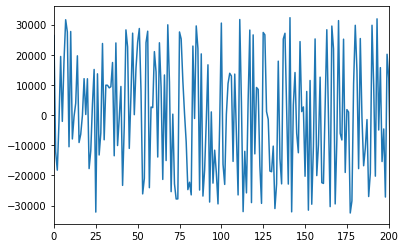

In [6]:
plt.plot(scaled)
plt.xlim(0, 200)

(0, 22050.0)

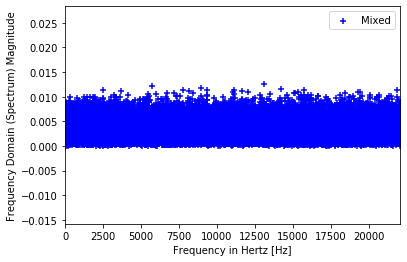

In [7]:

X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * f_s

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.absolute(X[mask]), 
           c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, f_s / 2)

(0, 0.01)

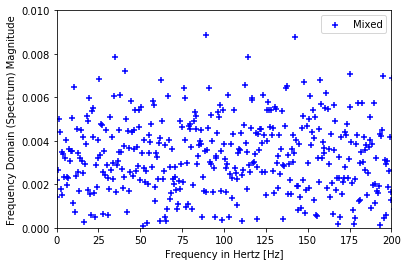

In [8]:
fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.absolute(X[mask]), 
           c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 200)
ax.set_ylim(0, 0.01)

### A single harmonic signal

(0, 0.0125)

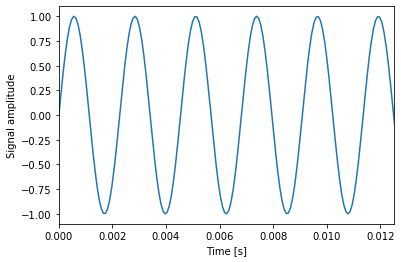

In [9]:
f = 440       # Frequency
f_s = 44100   # Sampling rate: measurements per second

t = np.linspace(0, 7, 2*f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

scaled = np.int16( x * A_max)
write('test_sin_440.wav', 44100, scaled)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

(0, 22050.0)

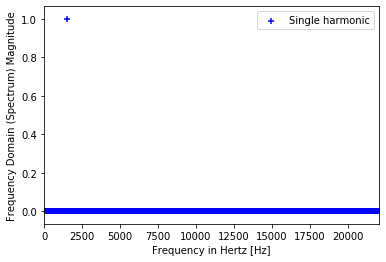

In [10]:
X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * f_s

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.absolute(X[mask]), 
           c="b", label="Single harmonic", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, f_s / 2)

(0, 2000)

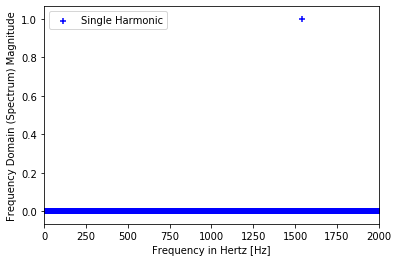

In [11]:
fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.absolute(X[mask]), 
           c="b", label="Single Harmonic", marker="+")
ax.legend(loc=0)

ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 2000)

### A mixed Signal

(0, 0.0125)

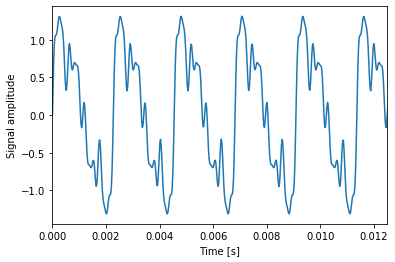

In [12]:
f0 = 440       # Frequency
f_s = 44100   # Sampling rate: measurements per second

f1 = 2 * f0
f2 = 3 * f0
f3 = 4 * f0
f4 = 8 * f0
f5 = 12* f0


t = np.linspace(0, 2, 2*f_s, endpoint=False)
x  = np.sin(f0 * 2 * np.pi * t)
x += 0.3 * np.sin(f1 * 2 * np.pi * t)
x += 0.4 * np.sin(f2 * 2 * np.pi * t)
x += 0.2 * np.sin(f3 * 2 * np.pi * t)
x += 0.2 * np.sin(f4 * 2 * np.pi * t)
x += 0.1 * np.sin(f5 * 2 * np.pi * t)

scaled = np.int16( x  * A_max / np.max(np.abs(x))  )
write('test_sin_440_mixed.wav', 44100, scaled)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude')
ax.set_xlim(0,1/80)

(0, 22050.0)

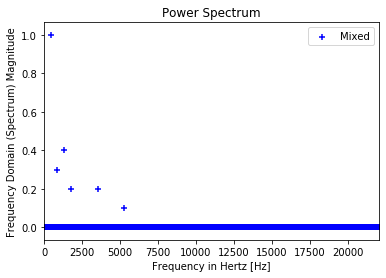

In [13]:
X = fft(x)
X = X * 2 / len(x)
freqs = fftfreq(len(x)) * f_s

mask = freqs >= 0

fig, ax = plt.subplots()
ax.scatter(freqs[mask], np.absolute(X[mask]), 
           c="b", label="Mixed", marker="+")
ax.legend(loc=0)

ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, f_s / 2)
